<a href="https://colab.research.google.com/github/data2450/deep-learning-into/blob/main/deeplearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
url='https://raw.githubusercontent.com/data2450/deep-learning-into/main/Churn_Modelling.csv'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv(url)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.isnull().values.any()

False

In [7]:
print(data.shape,"\n")
data.nunique()

(10000, 14) 



RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**0 stands for not exited, which is 80% of the data, and 1 stands for Exited. Similarly, 0 stands for Active Member and 1 stands for not Active Member. The same applies to Credit Card.**

In [8]:
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]


In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [11]:
y.value_counts()
print('No exited', round(y.value_counts()[0]/len(y) * 100,2), '% of the dataset')
print('exited', round(y.value_counts()[1]/len(y) * 100,2), '% of the dataset')

No exited 79.63 % of the dataset
exited 20.37 % of the dataset


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


not doing any eda

**lets create dummy variables**

In [13]:
geography=pd.get_dummies(X["Geography"],drop_first=True)

gender=pd.get_dummies(X['Gender'],drop_first=True)

In [14]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [15]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [17]:
 y_test.shape

(2000,)

# feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# ANN

In [19]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, a linear stack of layers

**Dense implements the operation**: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

Note: If the input to the layer has a rank greater than 2, then Dense computes the dot product between the inputs and the kernel along the last axis of the inputs and axis 1 of the kernel (using tf.tensordot). For example, if input has dimensions (batch_size, d0, d1), then we create a kernel with shape (d1, units), and the kernel operates along axis 2 of the input, on every sub-tensor of shape (1, 1, d1) (there are batch_size * d0 such sub-tensors). The output in this case will have shape (batch_size, d0, units).

Besides, layer attributes cannot be modified after the layer has been called once (except the trainable attribute).







**LeakyReLU,PReLU,ELU** these  are activation function 

**Why do we need Non-linear activation functions :-**
A neural network without an activation function is essentially just a linear regression model. The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks.

We know, neural network has neurons that work in correspondence of weight, bias and their respective activation function. In a neural network, we would update the weights and biases of the neurons on the basis of the error at the output. This process is known as back-propagation. Activation functions make the back-propagation possible since the gradients are supplied along with the error to update the weights and biases.
**Dropout is a technique where randomly selected neurons are ignored during training.**
**Dropout is a regularization** method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

drop out technique is used to avoid overfitting , during one iteration the algorithm will not consider that  randomly n.o of neurons as for the calculation

In [20]:
# Initialising the ANN
classifier = Sequential()

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

**Adding input layer (First Hidden Layer)**
We use the add method to add different layers to our ANN. The first parameter is the number of nodes you want to add to this layer. There is no rule of thumb as to how many nodes you should add. However, a common strategy is to choose the number of nodes as the average of nodes in the input layer and the number of nodes in the output layer.
Say for example you had five independent variables and one output. Then you would take the sum of that and divide by two, which is three. You can also decide to experiment with a technique called parameter tuning. The second parameter, kernel_initializer, is the function that will be used to initialize the weights.
In this case, it will use a uniform distribution to make sure that the weights are small numbers close to zero. The next parameter is the activation function. We use the Rectifier function, shortened as ReLU. We mostly use this function for the hidden layer in ANN. The final parameter is input_dim, which is the number of nodes in the input layer. It represents the number of independent variables.

In [21]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=  6, kernel_initializer = 'uniform' ,activation='relu',input_shape=(11,)))

In [22]:
# Adding the second hidden layer
classifier.add(Dense(units= 6, kernel_initializer  = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer  = 'glorot_uniform', activation = 'sigmoid'))
#since thses is a regresin prb we are using using sigmoid in the output layer


We change the first parameter because in our output node we expect one node. This is because we are only interested in knowing whether a claim was fraudulent or not. We change the activation function because we want to get the probabilities that a claim is fraudulent. We do this by using the Sigmoid activation function.
In case you’re dealing with a classification problem that has more than two classes (i.e. classifying cats, dogs, and monkeys) we’d need to change two things. We’d change the first parameter to 3 and change the activation function to softmax. Softmax is a sigmoid function applied to an independent variable with more than two categories.

**adamax optimizer**:It is a variant of Adam based on the infinity norm

**Arguments**

**learning_rate**: A Tensor, floating point value, or a schedule that is a tf.keras.optimizers.schedules.LearningRateSchedule. The learning rate.

**beta_1**: A float value or a constant float tensor. The exponential decay rate for the 1st moment estimates.

**beta_2**: A float value or a constant float tensor. The exponential decay rate for the exponentially weighted infinity norm.
**epsilon**: A small constant for numerical stability.

**name**: Optional name for the operations created when applying gradients. Defaults to "Adamax".

**kwargs**: Keyword arguments. Allowed to be one of "clipnorm" or "clipvalue". "clipnorm" (float) clips gradients by norm; "clipvalue" (float) clips gradients by value.

m = beta1 * m + (1 - beta) * g

v = max(beta2 * v, abs(g))

current_lr = learning_rate / (1 - beta1 ** t)

w = w - current_lr * m / (v + epsilon)

Similarly to Adam, the epsilon is added for numerical stability (especially to get rid of division by zero when v_t == 0).

In contrast to Adam, the sparse implementation of this algorithm (used when the gradient is an IndexedSlices object, typically because of tf.gather or an embedding lookup in the forward pass) only updates variable slices and corresponding m_t, v_t terms when that part of the variable was used in the forward pass. This means that the sparse behavior is contrast to the dense behavior (similar to some momentum implementations which ignore momentum unless a variable slice was actually used).

# Compiling the ANN
Compiling is basically applying a stochastic gradient descent to the whole neural network. The first parameter is the algorithm you want to use to get the optimal set of weights in the neural network. The algorithm used here is a stochastic gradient algorithm.
There are many variants of this. A very efficient one to use is Adam. The second parameter is the loss function within the stochastic gradient algorithm. Since our categories are binary, we use the binary_crossentropy loss function. Otherwise we would have used categorical_crossentopy. The final argument is the criterion we’ll use to evaluate our model. In this case we use the accuracy.

In [23]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting our ANN to the training set

X_train represents the independent variables we’re using to train our ANN, and y_train represents the column we’re predicting. Epochs represents the number of times we’re going to pass our full dataset through the ANN. Batch_size is the number of observations after which the weights will be updated.

In [24]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5207 - accuracy: 0.7962 - val_loss: 0.4520 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4374 - accuracy: 0.7962 - val_loss: 0.4373 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4275 - accuracy: 0.7962 - val_loss: 0.4318 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4224 - accuracy: 0.7962 - val_loss: 0.4284 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4193 - accuracy: 0.7962 - val_loss: 0.4259 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8231 - val_loss: 0.4240 - val_accuracy: 0.8213
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4145 - accuracy: 0.8291 - val_loss: 0.4219 - val_accuracy: 0.8247

In [25]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


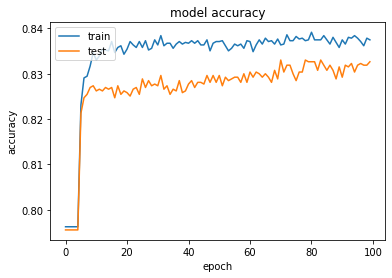

In [26]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

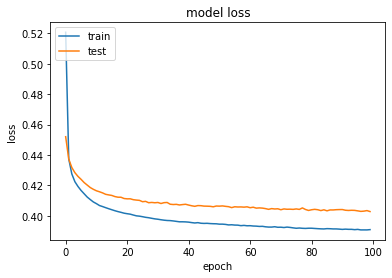

In [27]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Making the predictions and evaluating the model

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


This will show us the probability of a claim being exited. We then set a threshold of 50% for classifying a claim as exited. This means that any claim with a probability of 0.5 or more will be classified as exited.
 

In [29]:
y_pred = (y_pred > 0.5)


In [30]:
y_test.value_counts()

0    1595
1     405
Name: Exited, dtype: int64

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1538,   57],
       [ 257,  148]])

In [32]:
(1516 + 210) / 2000

0.863

The confusion matrix can be interpreted as follows. Out of 2000 observations, 1516 + 210 observations were correctly predicted while 79 + 195 were incorrectly predicted. You can calculate the accuracy by dividing the number of correct predictions by the total number of predictions. In this case (1516 + 210) / 2000, which gives you 86%.

In [33]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.843

Since our classifier expects numpy arrays, we have to transform the single observation into a numpy array and use the standard scaler to scale it.

# Evaluating our ANN
After training the model one or two times, you’ll notice that you keep getting different accuracies. So you’re not quite sure which one is the right one. This introduces the bias variance trade off. In essence, we’re trying to train a model that will be accurate and not have too much variance of accuracy when trained several times.
To solve this problem we use the K-fold cross validation with K equal to 10. This will split the training set into 10 folds. We’ll then train our model on 9 folds and test it on the remaining fold. Since we have 10 folds, we’re going to do this iteratively through 10 combinations. Each iteration will gives us its accuracy. We’ll then find the mean of all accuracies and use that as our model accuracy. We also calculate the variance to ensure that it’s minimal.
Keras has a scikit learn wrapper (KerasClassifier) that enables us to include K-fold cross validation in our Keras code.

In [34]:
from keras.wrappers.scikit_learn import KerasClassifier

Next we import the k-fold cross validation function from scikit_learn

In [35]:
from sklearn.model_selection import cross_val_score

The KerasClassifier expects one of its arguments to be a function, so we need to build that function.The purpose of this function is to build the architecture of our ANN.

In [59]:
def make_classifier():
    classifier = Sequential()
    classiifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim=11))
    classiifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(1, kernel_initializer = 'unifor', activation = 'sigmoid'))
    classifier.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier

This function will build the classifier and return it for use in the next step. The only thing we have done here is wrap our previous ANN architecture in a function and return the classifier.
We then create a new classifier using K-fold cross validation and pass the parameter build_fn as the function we just created above. Next we pass the batch size and the number of epochs, just like we did in the previous classifier.

In [55]:
classifier = KerasClassifier(build_fn = make_classifier,
                            batch_size=10, epochs=100)

To apply the k-fold cross validation function we can use scikit-learn’s cross_val_score function. The estimator is the classifier we just built with make_classifier and n_jobs=-1 will make use of all available CPUs. cv is the number of folds and 10 is a typical choice. The cross_val_score will return the ten accuracies of the ten test folds used in the computation.

In [60]:
accuracies = cross_val_score(estimator =classifier ,
                             X = X_train,
                             y = y_train,
                             cv = 10,
                             n_jobs = -1)

To obtain the relative accuracies we get the mean of the accuracies.

In [61]:
mean = accuracies.mean()


In [ ]:
variance = accuracies.var()
variance
                             
                             
                              

# Fighting Overfitting

Overfitting in machine learning is what happens when a model learns the details and noise in the training set such that it performs poorly on the test set. This can be observed when we have huge differences between the accuracies of the test set and training set, or when you observe a high variance when applying k-fold cross validation.
In artificial neural networks, we counteract this using a technique called dropout regularization. Dropout regularization works by randomly disabling some neurons at each iteration of the training to prevent them from being too dependent on each other

In [63]:
from keras.layers import Dropout

classifier1 = Sequential()
classifier1.add(Dense(3, kernel_initializer = 'uniform', activation = 'relu', input_dim=11))

# Notice the dropouts
classifier1.add(Dropout(rate = 0.1))
classifier1.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
classifier1.add(Dropout(rate = 0.1))

classifier1.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier1.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


In this case we apply the dropout after the first hidden layer and after the second hidden layer. Using a rate of 0.1 means that 1% of the neurons will be disabled at each iteration. It is advisable to start with a rate of 0.1. However you should never go beyond 0.4 because you will now start to get underfitting.

# Parameter Tuning

Once you obtain your accuracy you can tune the parameters to get a higher accuracy. Grid Search enables us to test different parameters in order to obtain the best parameters.
The first step here is to import the GridSearchCV module from sklearn.

In [68]:
from sklearn.model_selection import GridSearchCV

We also need to modify our make_classifier function as follows. We create a new variable called optimizer that will allow us to add more than one optimizer in our params variable.


In [101]:
def make_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim=11))
    classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer= optimizer,loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier

We’ll still use the KerasClassifier, but we won’t pass the batch size and number of epochs since these are the parameters we want to tune.

In [102]:
classifier = KerasClassifier(build_fn = make_classifier)

The next step is to create a dictionary with the parameters we’d like to tune — in this case the batch size, the number of epochs, and the optimizer function. We still use Adam as an optimizer and add a new one called rmsprop. The Keras documentation recommends rmsprop when dealing with Recurrent Neural Networks. However we can try it for this ANN to see if it gives us a better result.

In [109]:
params = {
    'batch_size':[20,35],
    'nb_epoch':[150,500],
    'optimizer':['adammax','adam']
}

In [110]:
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10)

In [111]:
grid_search = grid_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown optimizer: adammax

  FitFailedWarning)


400/400 [==============================] - 0s 890us/step - loss: 0.5324 - accuracy: 0.7949


We can get the best selection of parameters using best_params from the grid search object. Likewise we use the best_score_ to get the best score.

In [112]:
best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(best_param)

best_accuracy

{'batch_size': 20, 'nb_epoch': 150, 'optimizer': 'adam'}


0.796